# Predicting ontology definitions and relationships using LLMs

This notebook contains the methods for analyzing the results of the prediction tasks.

See [Makefile](Makefile) for how the results were generated

In [1]:
# initial imports
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yaml
import glob

## Loading YAML result objects

Each run generates a single yaml object

In [2]:
def get_method(obj):
    if obj.get("generate_background"):
        return "background"
    additional = obj.get("additional_collections", [])
    if additional:
        assert len(additional) == 1
        x = additional[0]
        if x.startswith("gh_"):
            return "github"
        elif x.startswith("devdocs"):
            return "devdocs"
        else:
            assert False
    else:
        return "direct"

def load_results(f):
    """Loads main results summaries"""
    obj = yaml.safe_load(open(f))
    ont = obj["source_collection"].replace("ont_", "")
    for k, v in obj["results"].items():
        obj[k] = v
    del obj["results"]
    obj["task"] = " ".join(obj["fields_to_predict"])
    obj["ontology"] = ont
    #additional = obj.get("additional_collections", [])
    #is_github = any(x for x in additional if x.startswith("gh_")) if additional else []
    #obj["method"] = "background" if obj.get("generate_background") else ("github" if is_github else "direct")
    obj["method"] = get_method(obj)
    return obj

from pathlib import Path
def load_granular_results():
    files = glob.glob("results/*.results.tsv")
    dfs = []
    for file in files:
        yaml_path = file.replace(".tsv", ".yaml")
        if not Path(yaml_path).exists():
            continue
        meta = yaml.safe_load(open(yaml_path))
        # print(file)
        res = pd.read_csv(file, comment="#", sep="\t")
        #res['task'] = res.apply(lambda row :  " ".join(row.get("fields_to_predict", [])), axis = 1)
        #res['ontology'] = res.apply(lambda row :  row.get("source_collection", "").replace("ont_", ""), axis = 1)
        res['task'] =  " ".join(meta.get("fields_to_predict"))
        res['ontology'] = meta.get("source_collection", "").replace("ont_", "")
        res["method"] = get_method(meta)
        res["model_name"] = meta["model_name"]
        res["accuracy"] = res["metric_accuracy"]
        dfs.append(res)
    return pd.concat(dfs)

all_df = load_granular_results()
all_df.describe(include='all')

,masked_id,expected_label,feature_definition,feature_aliases,feature_relationships,feature_logical_definition,masked_original_id,predicted_label,metric_precision,metric_recall,...,predicted_definition,id,label,definition,aliases,relationships,logical_definition,original_id,expected_logical_definition,predicted_logical_definition
count,7650,2120,4184,0.0,5530,1772,7650,2110,7650.000000,7650.000000,...,2516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182,474
unique,490,490,432,NaN,424,122,490,1289,NaN,NaN,...,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,308
top,LungMigratoryDendriticCell,lung migratory dendritic cell,A dendritic cell that captures antigens in a l...,NaN,"[{'predicate': 'subClassOf', 'target': 'Functi...","[{'predicate': 'rdfs:subClassOf', 'target': 'F...",CL:4033045,The Thing,NaN,NaN,...,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'predicate': 'rdfs:subClassOf', 'target': 'F...","[{'predicate': 'rdfs:subClassOf', 'target': 'O..."
freq,20,5,12,NaN,120,18,20,8,NaN,NaN,...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231570,0.236723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.399855,0.405502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import glob

def load_all_results():
    files = glob.glob("results/*.results.yaml")
    objs = [load_results(f) for f in files]
    return objs

objs = load_all_results()
len(objs)
    

156

In [4]:
df = pd.DataFrame(objs)
df = df.query("model_name != 'llama2'") # incomplete
df.describe(include="all")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,recall,f1_score,accuracy,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology
count,156,156,156,156,156,156,156,156,156,156,...,156.000000,156.000000,156.000000,156.0,156.000000,156.0,156.000000,156.000000,156,156
unique,3,1,2,156,156,1,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10
top,gpt-3.5-turbo,openai:,False,2023-09-04 13:31:12.160393,2023-09-04 13:32:28.413164,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,definition,cl
freq,64,156,112,1,1,156,156,156,102,156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,20
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.235345,0.228384,0.213922,0.0,15.788462,0.0,43.589744,38.467949,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197778,0.192219,0.182995,0.0,15.532696,0.0,19.531570,16.996933,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.060000,0.060000,0.060000,0.0,3.000000,0.0,33.000000,29.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.203819,0.188627,0.160000,0.0,13.000000,0.0,42.000000,39.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.380000,0.377143,0.344917,0.0,26.000000,0.0,47.000000,47.000000,NaN,NaN


In [5]:
df.query(f"task=='relationships' and method=='direct' and model_name=='gpt-4'")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,recall,f1_score,accuracy,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology
8,gpt-4,openai:,False,2023-09-04 15:43:59.941050,2023-09-04 15:46:53.396269,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.330000,0.316667,0.306667,0.0,17,0,37,34,relationships,hp
26,gpt-4,openai:,False,2023-09-02 14:51:53.620961,2023-09-02 14:54:23.434579,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.590000,0.592667,0.560000,0.0,34,0,26,28,relationships,obi
28,gpt-4,openai:,False,2023-09-02 14:59:44.618102,2023-09-02 15:03:24.509734,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.446667,0.442333,0.397000,0.0,43,0,55,50,relationships,go
38,gpt-4,openai:,False,2023-09-02 15:17:37.550870,2023-09-02 15:21:01.111722,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.328333,0.308381,0.264000,0.0,24,0,62,67,relationships,mondo
54,gpt-4,openai:,False,2023-09-01 21:33:32.303604,2023-09-01 21:36:37.605494,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.343194,0.285952,0.206082,0.0,26,0,76,62,relationships,uberon
98,gpt-4,openai:,False,2023-09-04 16:26:19.035616,2023-09-04 16:29:11.132408,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.540000,0.533333,0.520000,0.0,29,0,26,27,relationships,mp
105,gpt-4,openai:,False,2023-09-02 14:44:27.768401,2023-09-02 14:47:20.951960,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.646667,0.606667,0.563333,0.0,39,0,26,24,relationships,envo
111,gpt-4,openai:,False,2023-09-03 22:54:08.502571,2023-09-03 22:57:50.483843,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.441333,0.469619,0.360000,0.0,60,0,46,69,relationships,oba
117,gpt-4,openai:,False,2023-09-02 15:08:18.151336,2023-09-02 15:12:19.045103,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.373333,0.333667,0.253857,0.0,40,0,89,65,relationships,cl
147,gpt-4,openai:,False,2023-09-03 21:47:09.433182,2023-09-03 21:50:34.668347,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.526667,0.453429,0.388000,0.0,39,0,48,29,relationships,foodon


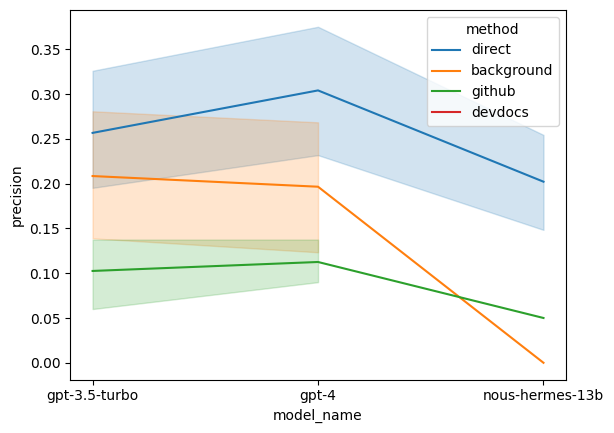

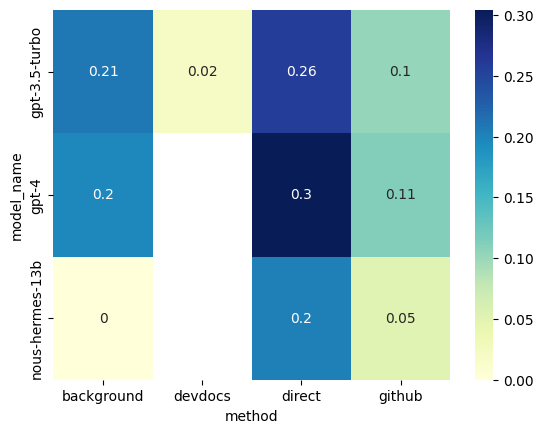

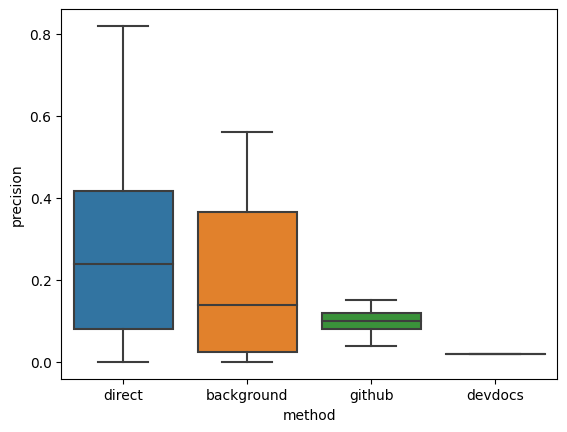

In [6]:

# Line plot for precision across different models and methods
sns.lineplot(data=df, x='model_name', y='precision', hue='method')
plt.show()

# Heatmap for precision
heatmap_data = pd.pivot_table(df, values='precision', 
                              index=['model_name'], 
                              columns='method')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.show()

# Boxplot for precision across different methods
sns.boxplot(data=df, x='method', y='precision')
plt.show()


In [7]:
from scipy import stats


def hm(task, method, df_x=None, metric="accuracy"):
    if df_x is None:
        df_x = df
    df_x = df_x.query(f"task=='{task}' and method=='{method}'")

    # Heatmap for precision
    heatmap_data = pd.pivot_table(df_x, values=metric, 
                                  index=['model_name'], 
                                  columns='ontology')
    sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
    plt.show()

def my_ttest(task, method):
    all_df_x = all_df.query(f"task=='{task}' and method=='{method}'")
    models = all_df_x["model_name"].unique()
    for m1 in models:
        for m2 in models:
            if m2 >= m1:
                continue
            model1_data = all_df_x[(all_df_x['model_name'] == m1)]['accuracy']
            model2_data = all_df_x[(all_df_x['model_name'] == m2)]['accuracy']

            # Step 2: Conduct the T-Test
            # Use ttest_ind to conduct the t-test
            t_statistic, p_value = stats.ttest_ind(model1_data, model2_data)

            print(f'{m1} v {m2}: len {len(model1_data)} v len {len(model2_data)}')
            print(f'{m1} v {m2}: T-statistic: {t_statistic}')
            print(f'{m1} v {m2}: P-value: {p_value}')
    
    

def lp(task, df_x=None):
    if df_x is None:
        df_x = df
    df_x = df_x.query(f"task=='{task}'")

    sns.lineplot(data=df_x, x='model_name', y='accuracy', hue='method')
    plt.show()

## Relationships Task

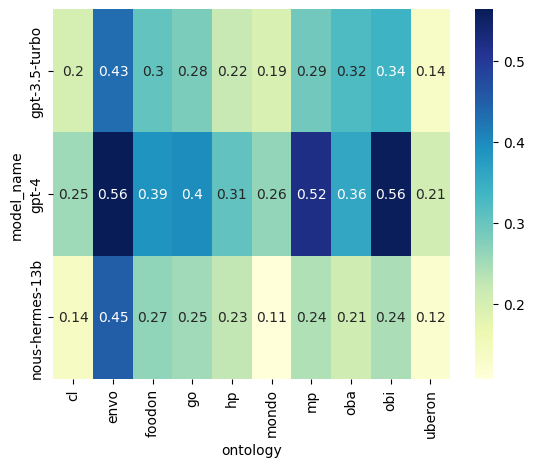

In [8]:
hm("relationships", "direct")

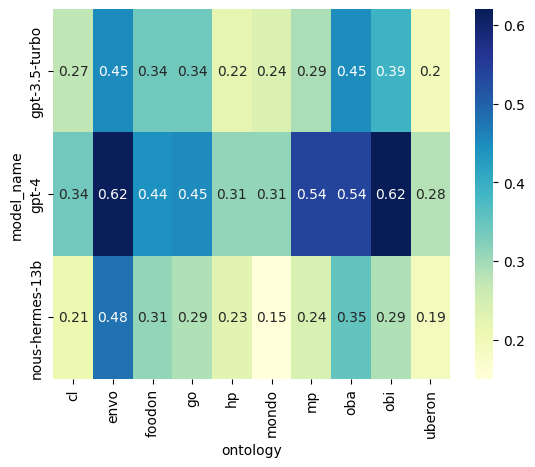

In [9]:
hm("relationships", "direct", metric="precision")

In [10]:
my_ttest("relationships", "direct")

gpt-4 v gpt-3.5-turbo: len 490 v len 490
gpt-4 v gpt-3.5-turbo: T-statistic: 4.469214662742097
gpt-4 v gpt-3.5-turbo: P-value: 8.768353309029942e-06
nous-hermes-13b v gpt-4: len 490 v len 490
nous-hermes-13b v gpt-4: T-statistic: -6.486698095269325
nous-hermes-13b v gpt-4: P-value: 1.3910174918183403e-10
nous-hermes-13b v gpt-3.5-turbo: len 490 v len 490
nous-hermes-13b v gpt-3.5-turbo: T-statistic: -2.025803774325807
nous-hermes-13b v gpt-3.5-turbo: P-value: 0.04305599783078805


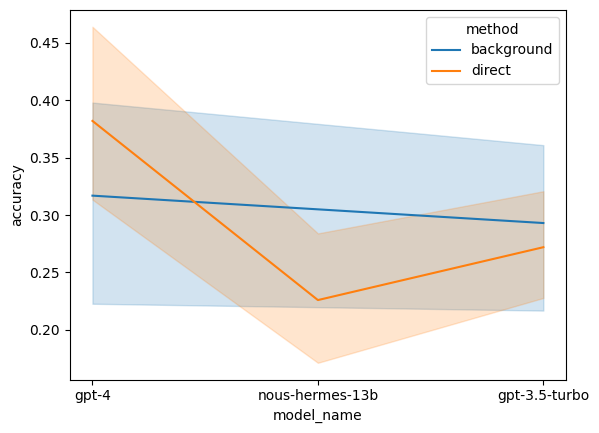

In [11]:
lp("relationships")

## Labels Task

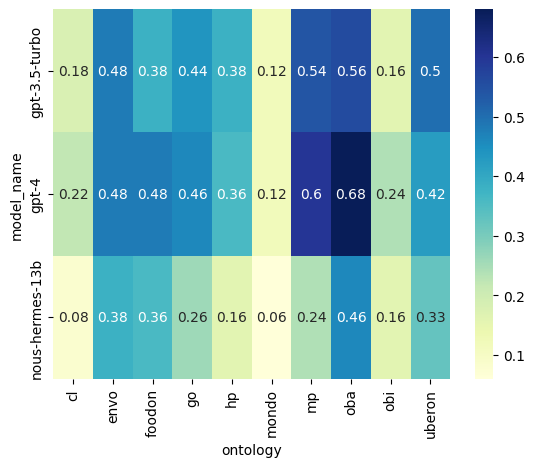

In [12]:
hm("label", "direct")

In [13]:
my_ttest("label", "direct")

nous-hermes-13b v gpt-3.5-turbo: len 490 v len 490
nous-hermes-13b v gpt-3.5-turbo: T-statistic: -4.250683289260626
nous-hermes-13b v gpt-3.5-turbo: P-value: 2.335200189764006e-05
nous-hermes-13b v gpt-4: len 490 v len 490
nous-hermes-13b v gpt-4: T-statistic: -5.38597410118751
nous-hermes-13b v gpt-4: P-value: 9.026676591209632e-08
gpt-4 v gpt-3.5-turbo: len 490 v len 490
gpt-4 v gpt-3.5-turbo: T-statistic: 1.1135702080895775
gpt-4 v gpt-3.5-turbo: P-value: 0.2657372192236665


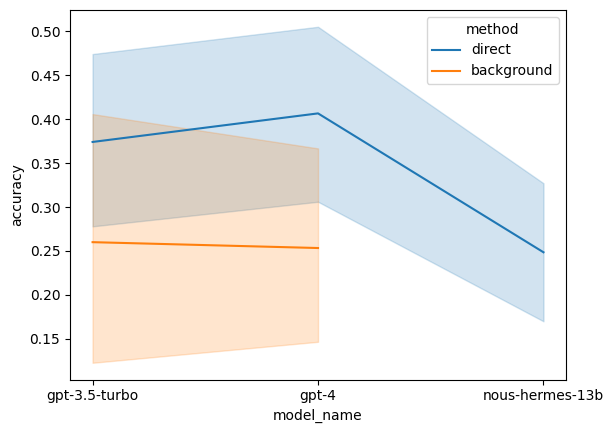

In [14]:
lp("label")

## Logical Definitions

In [15]:
import numpy as np

def load_ldef_results_tsv(f):
    res = pd.read_csv(f, comment="#", sep="\t")
    res['expected_logical_definition'].replace('', np.nan, inplace=True)
    res = res[res['expected_logical_definition'].notnull()]
    # Calculate Accuracy per row: (TP + TN) / (TP + TN + FP + FN)
    # Since we can't calculate TN here, we'll omit it from the formula
    res['accuracy'] = res['metric_true_positives'] / (res['metric_true_positives'] + res['metric_false_positives'] + res['metric_false_negatives'])
    res['precision'] = res['metric_true_positives'] / (res['metric_true_positives'] + res['metric_false_positives'])

    return res
    

res = load_ldef_results_tsv("results/ont_go-Plogical_definition-Mid.original_id-BGFalse-TrNone-Te50-Mgpt-4-EMopenai.results.tsv")
res.describe(include="all")

,id,label,definition,aliases,relationships,logical_definition,original_id,masked_id,feature_label,feature_definition,...,metric_recall,metric_f1_score,metric_accuracy,metric_specificity,metric_true_positives,metric_true_negatives,metric_false_positives,metric_false_negatives,accuracy,precision
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,15,15,...,15.000000,15.000000,15.000000,15.0,15.000000,15.0,15.000000,15.000000,15.000000,15.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CasparianStripAssembly,Casparian strip assembly,"The aggregation, arrangement and bonding toget...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.877778,0.877778,0.833333,0.0,1.866667,0.0,0.266667,0.266667,0.833333,0.877778
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.213313,0.213313,0.288675,0.0,0.516398,0.0,0.457738,0.457738,0.288675,0.213313
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500000,0.500000,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.333333,0.500000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.833333,0.833333,0.750000,0.0,2.000000,0.0,0.000000,0.000000,0.750000,0.833333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,0.0,2.000000,0.0,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,0.0,2.000000,0.0,0.500000,0.500000,1.000000,1.000000


In [16]:
def load_all_results_ldefs():
    files = glob.glob("results/*.results.yaml")
    objs = []
    for f in files:
        obj = load_results(f)
        if obj["task"] != "logical_definition":
            continue
        accuracy = load_ldef_results_tsv(f.replace(".yaml", ".tsv"))["accuracy"].mean()
        obj["accuracy"] = accuracy
        objs.append(obj)
    return objs

objs = load_all_results_ldefs()

In [17]:
ldefs_df = pd.DataFrame(objs)

### Logical Definitions (Excluding terms with none)

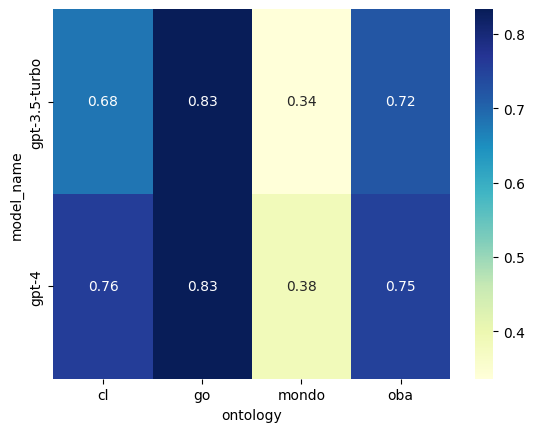

In [18]:
hm("logical_definition", "direct", ldefs_df)

### Logical Definitions (including over-prediction)

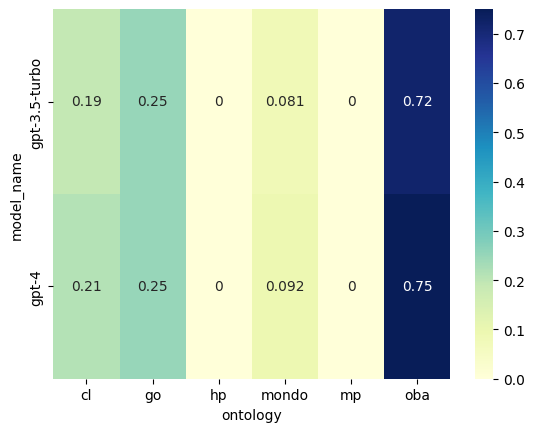

In [19]:
hm("logical_definition", "direct")

## Definitions Task

### Definitions (direct)

No additional background knowledge

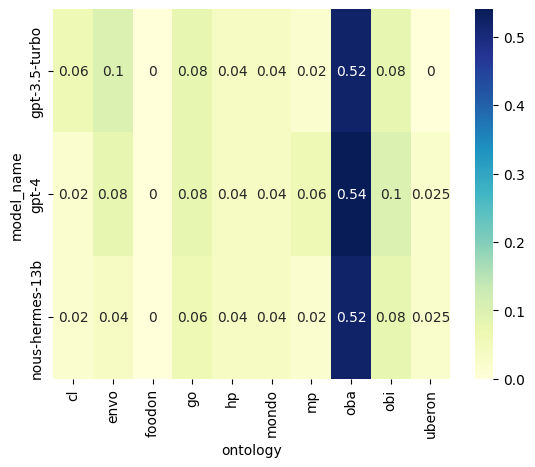

In [20]:
hm("definition", "direct")

In [21]:
my_ttest("definition", "direct")

nous-hermes-13b v gpt-4: len 490 v len 490
nous-hermes-13b v gpt-4: T-statistic: -0.7698878312632776
nous-hermes-13b v gpt-4: P-value: 0.44155234613215655
nous-hermes-13b v gpt-3.5-turbo: len 490 v len 490
nous-hermes-13b v gpt-3.5-turbo: T-statistic: -0.5553592957013923
nous-hermes-13b v gpt-3.5-turbo: P-value: 0.5787759324255379
gpt-4 v gpt-3.5-turbo: len 490 v len 490
gpt-4 v gpt-3.5-turbo: T-statistic: 0.21470784319793623
gpt-4 v gpt-3.5-turbo: P-value: 0.8300398676332532


### Definitions with github as background method

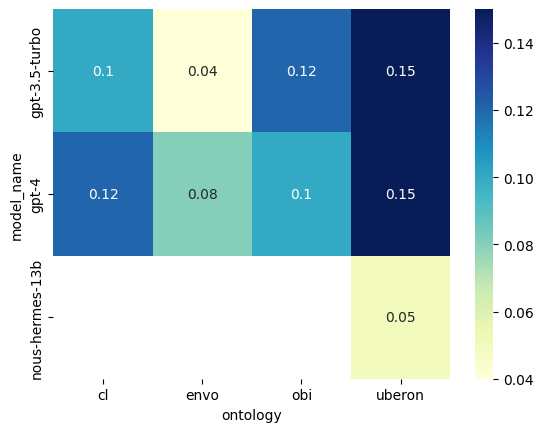

In [22]:
hm("definition", "github")

### Definitions with auto-generated background summaries

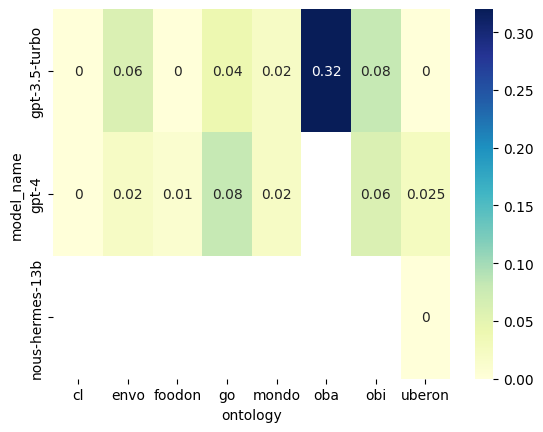

In [23]:
hm("definition", "background")

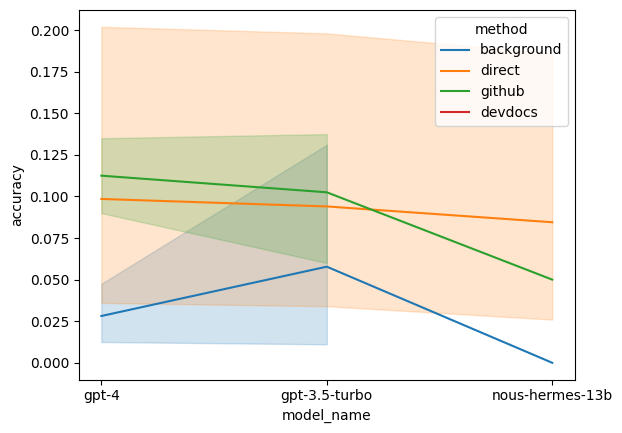

In [24]:
lp("definition")

### Definitions using developer docs

In [25]:
df.query("ontology == 'cl' and task == 'definition'")["method"].unique()

array(['background', 'github', 'direct', 'devdocs'], dtype=object)

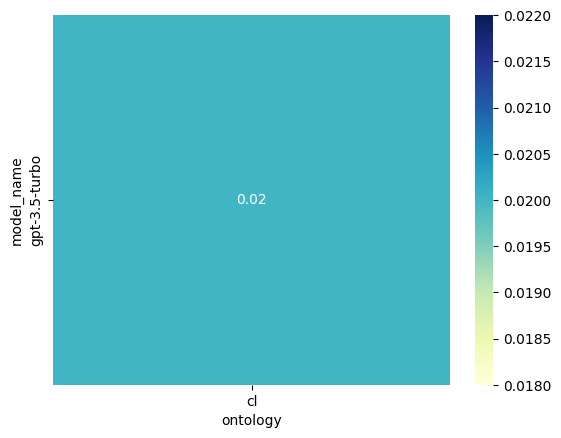

In [26]:
hm("definition", "devdocs", df.query("ontology == 'cl'"))

### Significance of different methods

In [27]:
methods = all_df["method"].unique()
models = all_df["model_name"].unique()
for m1 in methods:
    for m2 in methods:
        if m2 >= m1:
            continue
        for mn in list(models) + [None]:
            if mn is None:
                all_df_x = all_df.query("task == 'definition'")
            else:
                all_df_x = all_df.query(f"task == 'definition' and model_name == '{mn}'")
            m1_data = all_df_x[(all_df_x['method'] == m1)]['accuracy']
            m2_data = all_df_x[(all_df_x['method'] == m2)]['accuracy']

            # Step 2: Conduct the T-Test
            # Use ttest_ind to conduct the t-test
            t_statistic, p_value = stats.ttest_ind(m1_data, m2_data)

            print(f'{mn}:: {m1} v {m2}: T-statistic: {t_statistic}')
            print(f'{mn}:: {m1} v {m2}: P-value: {p_value}')


gpt-3.5-turbo:: direct v background: T-statistic: 2.0875438001560243
gpt-3.5-turbo:: direct v background: P-value: 0.03711127178139538
gpt-4:: direct v background: T-statistic: 4.235259796886408
gpt-4:: direct v background: P-value: 2.523731876866026e-05
nous-hermes-13b:: direct v background: T-statistic: 1.9328344617694948
nous-hermes-13b:: direct v background: P-value: 0.05379100430828232
None:: direct v background: T-statistic: 4.582097381577218
None:: direct v background: P-value: 4.845420315464471e-06
gpt-3.5-turbo:: direct v devdocs: T-statistic: 1.7989544413644611
gpt-3.5-turbo:: direct v devdocs: P-value: 0.07258619973428591
gpt-4:: direct v devdocs: T-statistic: nan
gpt-4:: direct v devdocs: P-value: nan
nous-hermes-13b:: direct v devdocs: T-statistic: nan
nous-hermes-13b:: direct v devdocs: P-value: nan
None:: direct v devdocs: T-statistic: 1.7829619482681742
None:: direct v devdocs: P-value: 0.07479227037204352
gpt-3.5-turbo:: github v direct: T-statistic: 0.1610926630603066

## Subsumption Analysis

Note that the relationships stats above are calculated on predicting *all* relationships.

To compare with owl2vec, we filter these for only subsumptions (subClassOf) relationships. See https://arxiv.org/pdf/2009.14654.pdf


In [28]:
import json

def subsumptions(rel_str: str):
    if pd.isnull(rel_str):
        return []
    if not isinstance(rel_str, str):
        print(f"BAD: {rel_str}")
        return []
    rels = yaml.safe_load(rel_str)
    for rel in rels:
         if "predicate" not in rel:
             print(f"BAD REL: {rel} in {rel_str}")
    return [r["target"] for r in rels if r.get("predicate", "") =="subClassOf"]

def calculate_metrics(row):
    expected_set = set(row['expected_subsumptions'])
    predicted_set = set(row['predicted_subsumptions'])
    
    TP = len(expected_set & predicted_set)
    FP = len(predicted_set - expected_set)
    FN = len(expected_set - predicted_set)
    
    # In a classical setting, TN would be calculated here. 
    # However, if you don't have information about what could have been predicted 
    # but wasn't (i.e., the universal set), TN can't be calculated.
    
    return pd.Series({'TP': TP, 'FP': FP, 'FN': FN})
    

def load_subsumption_results_tsv(f):
    res = pd.read_csv(f, comment="#", sep="\t")
    res['expected_subsumptions'] = res.apply(lambda row : subsumptions(row['expected_relationships']), axis = 1)
    res['predicted_subsumptions'] = res.apply(lambda row : subsumptions(row['predicted_relationships']), axis = 1)
    metrics_df = res.apply(calculate_metrics, axis=1)

    # Add the metrics as new columns to the original DataFrame
    df_with_metrics = pd.concat([df, metrics_df], axis=1)

    # Calculate Accuracy per row: (TP + TN) / (TP + TN + FP + FN)
    # Since we can't calculate TN here, we'll omit it from the formula
    df_with_metrics['accuracy'] = df_with_metrics['TP'] / (df_with_metrics['TP'] + df_with_metrics['FP'] + df_with_metrics['FN'])
    df_with_metrics['precision'] = df_with_metrics['TP'] / (df_with_metrics['TP'] + df_with_metrics['FP'])

    return df_with_metrics
    

res = load_subsumption_results_tsv("results/ont_uberon-Prelationships-Mid.original_id-BGFalse-TrNone-Te40-Mgpt-4-EMopenai.results.tsv")
res.describe(include="all")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology,TP,FP,FN
count,156,156,156,156,156,156,156,156,156,156,...,156.0,156.000000,156.0,156.000000,156.000000,156,156,40.000000,40.000000,40.000000
unique,3,1,2,156,156,1,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,4,10,NaN,NaN,NaN
top,gpt-3.5-turbo,openai:,False,2023-09-04 13:31:12.160393,2023-09-04 13:32:28.413164,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,NaN,NaN,NaN,NaN,NaN,definition,cl,NaN,NaN,NaN
freq,64,156,112,1,1,156,156,156,102,156,...,NaN,NaN,NaN,NaN,NaN,58,20,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,15.788462,0.0,43.589744,38.467949,NaN,NaN,0.300000,0.675000,0.950000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,15.532696,0.0,19.531570,16.996933,NaN,NaN,0.464095,0.525625,0.714322
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.000000,0.0,33.000000,29.000000,NaN,NaN,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,13.000000,0.0,42.000000,39.000000,NaN,NaN,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,26.000000,0.0,47.000000,47.000000,NaN,NaN,1.000000,1.000000,1.000000


In [29]:
import json

def subsumptions(rel_str: str):
    if pd.isnull(rel_str):
        return []
    if not isinstance(rel_str, str):
        print(f"BAD: {rel_str}")
        return []
    rels = yaml.safe_load(rel_str)
    for rel in rels:
         if "predicate" not in rel:
             print(f"BAD REL: {rel} in {rel_str}")
    return [r["target"] for r in rels if r.get("predicate", "") =="subClassOf"]

def calculate_metrics(row):
    expected_set = set(row['expected_subsumptions'])
    predicted_set = set(row['predicted_subsumptions'])
    
    TP = len(expected_set & predicted_set)
    FP = len(predicted_set - expected_set)
    FN = len(expected_set - predicted_set)
    
    # In a classical setting, TN would be calculated here. 
    # However, if you don't have information about what could have been predicted 
    # but wasn't (i.e., the universal set), TN can't be calculated.
    
    return pd.Series({'TP': TP, 'FP': FP, 'FN': FN})
    

def load_subsumption_results_tsv(f):
    res = pd.read_csv(f, comment="#", sep="\t")
    res['expected_subsumptions'] = res.apply(lambda row : subsumptions(row['expected_relationships']), axis = 1)
    res['predicted_subsumptions'] = res.apply(lambda row : subsumptions(row['predicted_relationships']), axis = 1)
    metrics_df = res.apply(calculate_metrics, axis=1)

    # Add the metrics as new columns to the original DataFrame
    df_with_metrics = pd.concat([df, metrics_df], axis=1)

    # Calculate Accuracy per row: (TP + TN) / (TP + TN + FP + FN)
    # Since we can't calculate TN here, we'll omit it from the formula
    df_with_metrics['accuracy'] = df_with_metrics['TP'] / (df_with_metrics['TP'] + df_with_metrics['FP'] + df_with_metrics['FN'])
    df_with_metrics['precision'] = df_with_metrics['TP'] / (df_with_metrics['TP'] + df_with_metrics['FP'])

    return df_with_metrics
    

res = load_subsumption_results_tsv("results/ont_uberon-Prelationships-Mid.original_id-BGFalse-TrNone-Te40-Mgpt-4-EMopenai.results.tsv")
res.describe(include="all")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology,TP,FP,FN
count,156,156,156,156,156,156,156,156,156,156,...,156.0,156.000000,156.0,156.000000,156.000000,156,156,40.000000,40.000000,40.000000
unique,3,1,2,156,156,1,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,4,10,NaN,NaN,NaN
top,gpt-3.5-turbo,openai:,False,2023-09-04 13:31:12.160393,2023-09-04 13:32:28.413164,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,NaN,NaN,NaN,NaN,NaN,definition,cl,NaN,NaN,NaN
freq,64,156,112,1,1,156,156,156,102,156,...,NaN,NaN,NaN,NaN,NaN,58,20,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,15.788462,0.0,43.589744,38.467949,NaN,NaN,0.300000,0.675000,0.950000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,15.532696,0.0,19.531570,16.996933,NaN,NaN,0.464095,0.525625,0.714322
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.000000,0.0,33.000000,29.000000,NaN,NaN,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,13.000000,0.0,42.000000,39.000000,NaN,NaN,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,26.000000,0.0,47.000000,47.000000,NaN,NaN,1.000000,1.000000,1.000000


In [30]:
res["accuracy"].mean()

0.25

In [31]:
def load_all_results_subsumptions():
    files = glob.glob("results/*.results.yaml")
    objs = []
    for f in files:
        obj = load_results(f)
        if obj["task"] != "relationships":
            continue
        accuracy = load_subsumption_results_tsv(f.replace(".yaml", ".tsv"))["accuracy"].mean()
        obj["accuracy"] = accuracy
        objs.append(obj)
    return objs

objs = load_all_results_subsumptions()

BAD REL: {'predictive': 'subClassOf', 'target': 'TransitionalEpithelialCell'} in [{'predicate': 'PartOf', 'target': 'Urothelium'}, {'predictive': 'subClassOf', 'target': 'TransitionalEpithelialCell'}]
BAD REL: {'predictor': 'hasCausalAgent', 'effect': 'increased hunger, malnutrition and consequent mortality'} in [{'predicate': 'subClassOf', 'target': 'AnthropogenicEnvironmentalProcess'}, {'predictor': 'hasCausalAgent', 'effect': 'increased hunger, malnutrition and consequent mortality'}]
BAD REL: {'predictive': 'subClassOf', 'target': 'Iris'} in [{'predicate': 'PartOf', 'target': 'CameraTypeEye'}, {'predictive': 'subClassOf', 'target': 'Iris'}]


### Main subsumption results

In [32]:
subs_df = pd.DataFrame(objs)

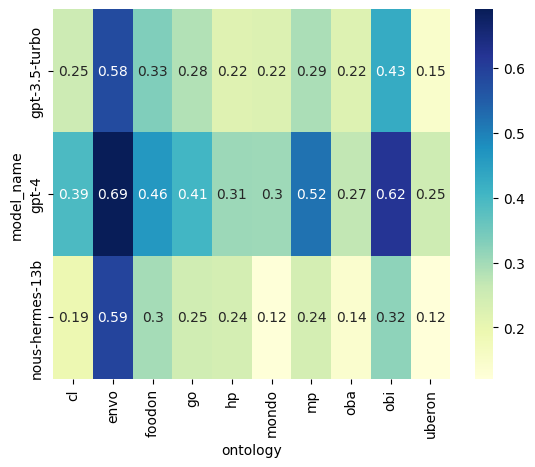

In [33]:
hm("relationships", "direct", subs_df)

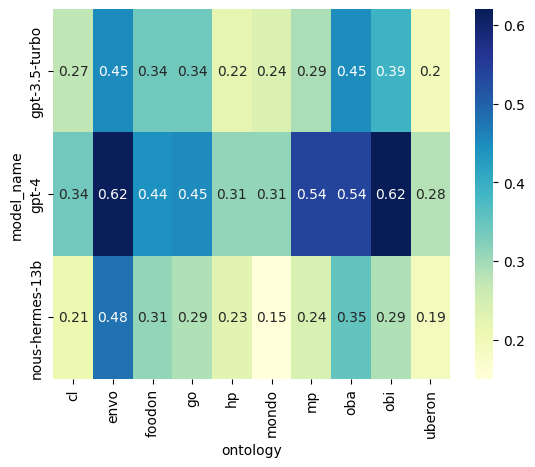

In [34]:
hm("relationships", "direct", subs_df, metric="precision")

### Subsumptions using background

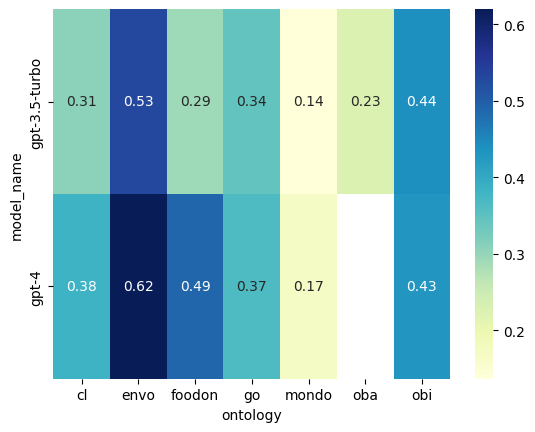

In [35]:
hm("relationships", "background", subs_df)

### Subsumptions using github

In [36]:
#hm("relationships", "github", subs_df)

## Preparing definitions for evaluation

In [37]:
defs_df = all_df.query("task == 'definition'")
defs_df.groupby('ontology').size().reset_index(name='count')

,ontology,count
0,cl,400
1,envo,350
2,foodon,350
3,go,250
4,hp,150
5,mondo,250
6,mp,150
7,oba,200
8,obi,350
9,uberon,360


In [38]:
len(defs_df)

2810

In [39]:
len(defs_df["expected_definition"].unique())

433

In [40]:

df_defs_gpt_direct = pd.read_csv("results/cl-defs-direct.tsv", sep="\t")
gpt_direct = { row["id"]: row["definition"] for _, row in df_defs_gpt_direct.iterrows() }
objs = []
for _, row in defs_df.iterrows():
    id = row["masked_original_id"]
    if id not in gpt_direct:
        continue
    row = {**row}
    row["predicted_definition"] = gpt_direct[id]
    row["model_name"] = "gpt-4"
    row["method"] = "no_RAG"
    del gpt_direct[id]
    objs.append(row)
all_defs_df = pd.concat([defs_df, pd.DataFrame(objs)])
all_defs_df

,masked_id,expected_label,feature_definition,feature_aliases,feature_relationships,feature_logical_definition,masked_original_id,predicted_label,metric_precision,metric_recall,...,predicted_definition,id,label,definition,aliases,relationships,logical_definition,original_id,expected_logical_definition,predicted_logical_definition
0,PignutHickoryNut,NaN,NaN,NaN,"[{'predicate': 'InTaxon', 'target': 'CaryaGlab...","[{'predicate': 'rdfs:subClassOf', 'target': 'C...",FOODON:00004448,NaN,0.0,0.0,...,A caryopsis fruit of a pignut hickory tree (Ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GreekYogurt,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Strain...",NaN,FOODON:00004409,NaN,0.0,0.0,...,Greek yogurt is a type of yogurt that is made ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TurkeyMeat_ground_sauteed_,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Turkey...",NaN,FOODON:00004417,NaN,0.0,0.0,...,Ground sautéed turkey meat is a specific type ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Raw,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'FoodOb...",NaN,FOODON:00004348,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SpeltFoodProduct,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'WheatF...",NaN,FOODON:00004434,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,IntermediateCellOfUrothelium,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Urothe...",NaN,CL:4030055,NaN,0.0,0.0,...,An intermediate cell of urothelium is a transi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,LungPerichondrialFibroblast,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Fibrob...","[{'predicate': 'rdfs:subClassOf', 'target': 'P...",CL:4033026,NaN,0.0,0.0,...,A lung perichondrial fibroblast is a type of f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,DiffuseBipolar1Cell,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'OFFBip...",NaN,CL:4033027,NaN,0.0,0.0,...,The diffuse bipolar 1 cell is a specialized ty...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,ChorionicGirdleCell,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Chorio...",NaN,CL:4040001,NaN,0.0,0.0,...,A chorionic girdle cell is a specialized type ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:

n = 0
objs = []
defns = {}
hiddens = []
for _, row in all_defs_df.sort_values(by=["masked_original_id", "predicted_definition"]).iterrows():
    for k in ["predicted_definition", "expected_definition"]:
        is_original = k=="expected_definition"
        defn = row[k]
        if not isinstance(defn, str):
            continue
        if not defn:
            continue
        if is_original and defn in defns:
            continue
        try:
            rels = yaml.safe_load(row["feature_relationships"])
        except:
            # print(row["feature_relationships"])
            rels = []
        n += 1
        obj = {
            "ontology": row["ontology"],
            "label": row["feature_label"],
            "definition": defn.replace("\n", " ").replace("\t", " "),
            "internal_id": n,
            "accuracy": "",
            "internal_consistency": "",
            "score": "",
            "confidence": "",
            "notes": "",
            "is_a": " | ".join([r.get("target", "") for r in rels if r.get("predicate", "") == "subClassOf"]),
            "relationships": " | ".join([str(r) for r in rels if r.get("predicate", "") != "subClassOf"]),
        }
        hidden = {**obj, "is_original": is_original, **row}
        hiddens.append(hidden)
        if defn in defns:
            continue
        defns[defn] = True
        objs.append(obj)
        
eval_defs_df = pd.DataFrame(objs)
#eval_defs_df.to_csv("definitions-sheets/definitions-src.tsv", sep="\t", index=False)
hiddens_df = pd.DataFrame(hiddens)
#hiddens_df.to_csv("definitions-sheets/key.tsv", sep="\t", index=False)

In [42]:
hiddens_df.groupby(['ontology', 'is_original']).size().reset_index(name='count')

,ontology,is_original,count
0,cl,False,444
1,cl,True,46
2,envo,False,281
3,envo,True,47
4,foodon,False,241
5,foodon,True,34
6,go,False,224
7,go,True,48
8,hp,False,143
9,hp,True,47


In [43]:
duplicate_defs = hiddens_df[hiddens_df['definition'].duplicated(keep=False)]
duplicate_defs

,ontology,label,definition,internal_id,accuracy,internal_consistency,score,confidence,notes,is_a,...,expected_relationships,predicted_relationships,expected_definition,predicted_definition,id,aliases,logical_definition,original_id,expected_logical_definition,predicted_logical_definition
0,cl,NaN,NaN,1,0.0,,,,,CiliatedCell,...,NaN,NaN,A ciliated cell of the respiratory system. Cil...,A cell of the respiratory tract epithelium tha...,NaN,NaN,NaN,NaN,NaN,NaN
1,cl,NaN,NaN,2,0.0,,,,,CiliatedCell,...,NaN,NaN,A ciliated cell of the respiratory system. Cil...,A cell of the respiratory tract epithelium tha...,NaN,NaN,NaN,NaN,NaN,NaN
2,cl,NaN,NaN,3,0.0,,,,,CiliatedCell,...,NaN,NaN,A ciliated cell of the respiratory system. Cil...,A ciliated cell found within the epithelium of...,NaN,NaN,NaN,NaN,NaN,NaN
3,cl,NaN,NaN,4,0.0,,,,,CiliatedCell,...,NaN,NaN,A ciliated cell of the respiratory system. Cil...,A ciliated cell of the respiratory tract epith...,NaN,NaN,NaN,NaN,NaN,NaN
4,cl,NaN,NaN,5,0.0,,,,,CiliatedCell,...,NaN,NaN,A ciliated cell of the respiratory system. Cil...,A ciliated cell that is part of the respirator...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,uberon,NaN,NaN,2947,0.0,,,,,OrganSubunit | EndodermDerivedStructure,...,NaN,NaN,A discrete anatomical unit of the lung that is...,A discrete anatomical unit of the lung that is...,NaN,NaN,NaN,NaN,NaN,NaN
2947,uberon,NaN,NaN,2948,0.0,,,,,OrganSubunit | EndodermDerivedStructure,...,NaN,NaN,A discrete anatomical unit of the lung that is...,A distinct anatomical structure that is an org...,NaN,NaN,NaN,NaN,NaN,NaN
2948,uberon,NaN,NaN,2949,0.0,,,,,OrganSubunit | EndodermDerivedStructure,...,NaN,NaN,A discrete anatomical unit of the lung that is...,A functionally independent subdivision of a lo...,NaN,NaN,NaN,NaN,NaN,NaN
2949,uberon,NaN,NaN,2950,0.0,,,,,OrganSubunit | EndodermDerivedStructure,...,NaN,NaN,A discrete anatomical unit of the lung that is...,A structural unit of the lung that is composed...,NaN,NaN,NaN,NaN,NaN,NaN
